# 📞 Customer Care Interaction Analysis for a Premium Carwash Business

Welcome to this data analysis project where I explore **real-life customer care interaction data** that I personally collected while working as a **Customer Care Representative** at a premium carwash brand serving high-end clientele across **10 branches**.

---

## 🚘 Business Context

This project was born out of a **real operational need**: to understand and improve the **quality of customer service** across a growing network of luxury carwash locations. I single-handedly managed the **toll-free customer care line** that handled **all branches**, and I was actively involved in **visiting outlets**, ensuring **service consistency**, and escalating issues that directly impacted:

- Client satisfaction 🧑‍💼  
- Revenue retention 💰  
- Operational efficiency ⚙️  

Our clients — often owners of high-end vehicles — would call for a variety of reasons, including:

- Inquiries about our **service packages and pricing**
- **Clarifications** about bookings or delays
- **Complaints** about service quality or missed appointments  
- **Feedback** or requests for follow-ups

Because we served premium customers, **trust was paramount**. Clients expected high responsiveness and professionalism. Their feedback often came with the belief that their concerns would be taken seriously — and it was my job to uphold that trust.

Over time, I realized that collecting, analyzing, and acting upon customer interaction data could provide **data-driven recommendations** to:

- Reduce repeat complaints  
- Improve service turnaround time  
- Identify underperforming branches  
- Optimize staffing during peak periods  

---

## 🧩 Dataset Overview

This dataset contains **anonymized records** of customer phone calls logged during service delivery. The key columns include:

- **`date`** – Date of contact  
- **`time`** – Time of contact  
- **`phone`** – Customer's phone number (partially anonymized; a few missing)  
- **`car_registration`** – Vehicle identifier (infrequently captured)  
- **`reason`** – Stated reason for calling (e.g., delay, feedback, follow-up, inquiry)  
- **`response`** – How the call was resolved or handled  
- **`location`** – Branch or outlet related to the complaint or service  

📌 **Note**: While most phone numbers were captured, **car registration numbers and caller names were often missing**, a reflection of real-world constraints when managing a high-volume customer line manually.

---

## 🎯 Project Goals

This analysis was designed to serve multiple stakeholders:

### 🧑‍💼 For Management:
- Identify **peak call times** and **busiest days** to improve resource allocation  
- Monitor **branch-level service quality** and spot outlets with repeated complaints  
- Evaluate **customer satisfaction patterns** based on responses  

### 👩‍💼 For Operations:
- Highlight **common customer issues**, from service inquiries to complaints  
- Reveal **locations requiring retraining** or escalation  
- Support **proactive interventions** before issues harm brand perception  

### 🧠 For Myself (as a Data Scientist):
- Showcase **real-world data wrangling**, analysis, and insight communication  
- Build a **portfolio-ready project** demonstrating business thinking and technical depth  
- Solve a **business problem I personally experienced**, turning frontline work into a data-driven case study  

---

## 🛠️ Tools & Techniques Used

| Category            | Tools / Methods |
|---------------------|------------------|
| **Programming**     | Python (Jupyter Notebook) |
| **Data Wrangling**  | Pandas, NumPy |
| **Visualization**   | Matplotlib, Seaborn |
| **Feature Engineering** | Extracted hour, weekday, period of day, month |
| **Exploratory Data Analysis (EDA)** | Counts, aggregations, value distributions |
| **Business Insights** | Call volume by time/location/reason/response, trends over time |
| **Exclusions/Filters** | Removed unknown callers, grouped recurring contacts |
| **Communication**   | Clean visuals, markdown storytelling, recruiter-ready formatting |

---

## 💡 Real-World Application

This is not a synthetic project. These insights can help real businesses:

- **A carwash franchise** can know when to staff more agents or improve wait times  
- **A customer experience team** can train staff on the most common complaint types  
- **An operations manager** can identify branches where service issues are harming retention  

> 💬 I turned my customer care role into a **data science project** by collecting, cleaning, and analyzing real customer call records — the kind of initiative and impact I aim to bring to future roles.

---

📌 **This project is part of my Data Science portfolio** and is designed to showcase end-to-end data analysis — from business understanding to technical execution — in a way that delivers **measurable value to decision-makers**.


## Data Loading and Initial Exploration

### Importing Libraries
We import key libraries for data handling, visualization, and preprocessing.


In [650]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# Preprocessing
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Display and aesthetic settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [651]:
# Step 1: # 📥 Load the customer care call dataset
calldata = pd.read_excel("CustomerTollFreeData.xlsx")


In [652]:
# 📐 Dataset shape and structure

# Check the number of rows and columns
print("Dataset shape:", calldata.shape)

# Display data types and non-null values
print("\nDataset information:")
calldata.info()


Dataset shape: (2122, 9)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DATE                       569 non-null    datetime64[ns]
 1   TIME                       1527 non-null   object        
 2   NAME                       64 non-null     object        
 3   PHONE                      1521 non-null   object        
 4   CAR REG                    125 non-null    object        
 5   TYPE                       93 non-null     object        
 6   REASON FOR CALL            1528 non-null   object        
 7   LOCATION/OUTLET            1516 non-null   object        
 8   RESPONSE GIVEN/CONCLUSION  1523 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 149.3+ KB


#### Data Cleaning

In [653]:
# cleaning column names
calldata.columns = calldata.columns.str.strip().str.upper()


#### Forward Filling Dates

In [654]:
# Fill missing DATE values with the previous non-null value (forward fill)
calldata['DATE'] = calldata['DATE'].fillna(method='ffill')



C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2102278666.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



##### Summary


- **Handled missing `DATE` values**:  
  Forward-filled missing `DATE` entries with the last valid value. The first row, which lacked a valid date, was dropped.
- Dropped `TIME` Missing values as they are records that do not exist.
  
  


In [655]:
# Drop columns with excessive missing values (>90%)
cols_to_drop = ["NAME", "TYPE", "CAR REG"]
calldata.drop(columns=cols_to_drop, inplace=True)


# Forward-fill missing DATEs (fill down from above)
calldata["DATE"] = calldata["DATE"].fillna(method="ffill")

# Drop any remaining row with missing DATE (likely first row)
calldata = calldata[calldata["DATE"].notna()]

# Fill missing values in other key columns with placeholders
calldata = calldata.fillna({
    "LOCATION/OUTLET": "Unknown Location",
    "PHONE ": "Unknown caller",
    "RESPONSE GIVEN/CONCLUSION": "Not Recorded",
    "REASON FOR CALL": "Unknown Reason"
})

# Optional: Confirm no missing values remain
missing_summary = pd.DataFrame({
    "Missing Values": calldata.isnull().sum(),
    "Percent_Missing": (calldata.isnull().sum() / len(calldata)) * 100,
    "Data_Type": calldata.dtypes
}).sort_values(by="Percent_Missing", ascending=False)

print("✅ Final Missing Value Summary:")
display(missing_summary)


✅ Final Missing Value Summary:


C:\Users\hp\AppData\Local\Temp\ipykernel_4040\480718707.py:7: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Missing Values,Percent_Missing,Data_Type
PHONE,600,28.288543,object
TIME,594,28.005658,object
DATE,0,0.000000,datetime64[ns]
REASON FOR CALL,0,0.000000,object
LOCATION/OUTLET,0,0.000000,object
RESPONSE GIVEN/CONCLUSION,0,0.000000,object


#### Standardizing Values in `LOCATION/OUTLET`

To ensure consistency in our analysis, we replaced the value `"All"` with `"Any"` in the `LOCATION/OUTLET` column. This standardization helps eliminate ambiguity in location labeling and improves the clarity of grouped insights later in the project.


In [656]:
# Replace all variations of 'All' (case-insensitive, trim spaces) with 'Any'
calldata["LOCATION/OUTLET"] = calldata["LOCATION/OUTLET"].str.strip().replace(r"(?i)^all$", "Any", regex=True)

 ### Review Data Types

In [657]:
# Check data types
calldata.dtypes


DATE                         datetime64[ns]
TIME                                 object
PHONE                                object
REASON FOR CALL                      object
LOCATION/OUTLET                      object
RESPONSE GIVEN/CONCLUSION            object
dtype: object

####  Standardizing the DATE Column
To ensure consistent analysis and plotting, we convert the `DATE` column to `datetime` format and extract only the date portion, removing any embedded time component.
- This ensures all records are aligned to proper calendar dates.
- It allows for easy grouping, filtering, and time-series analysis.


In [658]:

# 1. Convert DATE to datetime.date
# Convert the DATE column (currently object type) to datetime format first,
# then extract just the date part (removes any potential time portion)
calldata["DATE"] = pd.to_datetime(calldata["DATE"], errors="coerce").dt.date

# 2. Clean TIME strings and convert to datetime.time

# - Replace '.' with ':' for proper time formatting (e.g., 12.50pm → 12:50pm)
# - Add space before 'am' or 'pm' if missing
# - Use pd.to_datetime with format '%I:%M %p' to parse time

# Clean TIME column
calldata["TIME"] = calldata["TIME"].astype(str)  # Ensure it's string for replacement
calldata["TIME"] = calldata["TIME"].str.replace(".", ":", regex=False)  # Replace dot with colon
calldata["TIME"] = calldata["TIME"].str.replace(r"(?i)(am|pm)", r" \1", regex=True).str.strip()  # Add space before am/pm

# Convert to datetime.time format
calldata["TIME"] = pd.to_datetime(calldata["TIME"], format="%I:%M %p", errors="coerce").dt.time




#### Dropping Missing TIME Values as those are empty records

In [659]:
from datetime import timedelta


# Drop all rows where TIME is missing
calldata = calldata.dropna(subset=["TIME"]).reset_index(drop=True)

# Confirm no missing TIME entries remain
print("Remaining missing TIME entries:", calldata["TIME"].isna().sum())



Remaining missing TIME entries: 0


### Feature Engineering: Time-Based Insights

We derived several **time-based features** from the cleaned `DATE` and `TIME` columns to better understand customer behavior and service trends:

- **`hour`**: Extracted from the `TIME` column to analyze call volume by hour of the day (peak vs. off-peak times).
- **`day_of_week`**: Derived from the `DATE` column to uncover patterns across weekdays and weekends.
- **`day`**: Indicates the calendar day of the month (1–31), useful for identifying spikes or drop-offs on specific dates.
- **`month`**: Helps reveal potential seasonal trends in call behavior or customer issues.
- **`call_period`**: A custom feature categorizing calls into four distinct time blocks:
  - **Morning**: 5:00 AM – 11:59 AM
  - **Afternoon**: 12:00 PM – 4:59 PM
  - **Evening**: 5:00 PM – 8:59 PM
  - **Night**: 9:00 PM – 4:59 AM
  
These features enable deeper temporal analysis, allowing us to answer key questions like:
- What times of day receive the most calls?
- Do certain issues occur more frequently on specific days?
- Are there weekend spikes or seasonal patterns in customer concerns?



In [660]:
# Extract HOUR from TIME
calldata['HOUR'] = calldata['TIME'].apply(lambda t: t.hour if pd.notnull(t) else None)

# DAY_OF_WEEK (e.g., Monday)
calldata['DAY_OF_WEEK'] = pd.to_datetime(calldata['DATE']).dt.day_name()

# DAY of the month
calldata['DAY'] = pd.to_datetime(calldata['DATE']).dt.day

# MONTH name
calldata['MONTH'] = pd.to_datetime(calldata['DATE']).dt.month_name()

# Custom CALL_PERIOD based on HOUR
def get_call_period(hour):
    if pd.isnull(hour):
        return "Unknown"
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

calldata['CALL_PERIOD'] = calldata['HOUR'].apply(get_call_period)


In [661]:
print(calldata.columns.tolist())


['DATE', 'TIME', 'PHONE', 'REASON FOR CALL', 'LOCATION/OUTLET', 'RESPONSE GIVEN/CONCLUSION', 'HOUR', 'DAY_OF_WEEK', 'DAY', 'MONTH', 'CALL_PERIOD']


### 🔐 Anonymizing Customer Phone Numbers (Privacy First)

To ensure customer confidentiality and responsible data handling practices, all phone numbers in this dataset have been anonymized.

The process involves:
- Validating phone numbers to retain only clean, numeric entries.
- Replacing actual phone numbers with generic aliases (e.g., *Caller 1*, *Caller 2*).
- Tagging unrecognized or invalid entries as *Unknown Caller*.
- Storing the alias mapping in a separate, private file (`private_phone_mapping.csv`) excluded from the public GitHub repository.

This step demonstrates my commitment to **data privacy, professionalism**, and **ethical data analysis** practices.


In [662]:
# Anonymize and Validate Phone Numbers

# Step 3.5: Clean and filter only valid numeric phone numbers
valid_contacts = (
    calldata['PHONE']
    .dropna()                          # Remove NaNs
    .astype(str)                       # Convert to string
    .str.strip()                       # Trim whitespace
)
valid_contacts = valid_contacts[valid_contacts.str.isnumeric()]  # Keep only digits
unique_valid_contacts = valid_contacts.unique()

# Step 4: Create mapping like { '0712345678': 'Caller 1', ... }
phone_to_alias = {number: f"Caller {i+1}" for i, number in enumerate(unique_valid_contacts)}

# Step 5: Replace phone numbers with aliases
calldata["PHONE"] = calldata["PHONE"].astype(str).str.strip().replace(phone_to_alias)
calldata["PHONE"] = calldata["PHONE"].where(calldata["PHONE"].str.startswith("Caller"), "Unknown Caller")

# Step 5.5: Rename column for clarity
calldata.rename(columns={"PHONE": "CALLER ALIAS"}, inplace=True)

# Step 6: Save the alias mapping privately (DO NOT upload to GitHub)
alias_df = pd.DataFrame(phone_to_alias.items(), columns=["Phone Number", "Caller Alias"])
alias_df.to_csv("private_phone_mapping.csv", index=False)


In [663]:
calldata

,DATE,TIME,CALLER ALIAS,REASON FOR CALL,LOCATION/OUTLET,RESPONSE GIVEN/CONCLUSION,HOUR,DAY_OF_WEEK,DAY,MONTH,CALL_PERIOD
0,2022-04-01,12:50:00,Caller 1,Inquiry on directions,Two Rivers,Advised,12,Friday,1,April,Afternoon
1,2022-04-01,16:42:00,Caller 2,Inquiry on oil removal,Garden City,Advised,16,Friday,1,April,Afternoon
2,2022-04-01,19:00:00,Caller 3,Client wanted to pick key,Mountain View,Advised,19,Friday,1,April,Evening
3,2022-04-02,10:40:00,Caller 4,Inquiry on packages,Two Rivers,Advised,10,Saturday,2,April,Morning
4,2022-04-03,10:22:00,Caller 5,Inquiry on packages,Garden City,Advised,10,Sunday,3,April,Morning
...,...,...,...,...,...,...,...,...,...,...,...
1508,2022-09-28,14:35:00,Caller 1321,Inquiry if carwash is open,Souhfield,Advised,14,Wednesday,28,September,Afternoon
1509,2022-09-29,11:07:00,Caller 1322,Inquiry on leather restoration,Galleria,Advised,11,Thursday,29,September,Morning
1510,2022-09-29,14:35:00,Caller 1321,Inquiry if carwash is open,Southfield,Advised,14,Thursday,29,September,Afternoon
1511,2022-09-30,11:19:00,Caller 1323,Inquiry if we sell machines,HQ,Advised-sent Brian's no.,11,Friday,30,September,Morning


## Data Analysis
### 1.Caller Insights

C:\Users\hp\AppData\Local\Temp\ipykernel_4040\1107689834.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_4040\1107689834.py:49: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_4040\1107689834.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_4040\1107689834.py:61: UserWarning:

Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Temp\ipykernel_4040\1107689834.py:62: UserWarning:

Glyph 128222 (\N{TELEPHONE REC

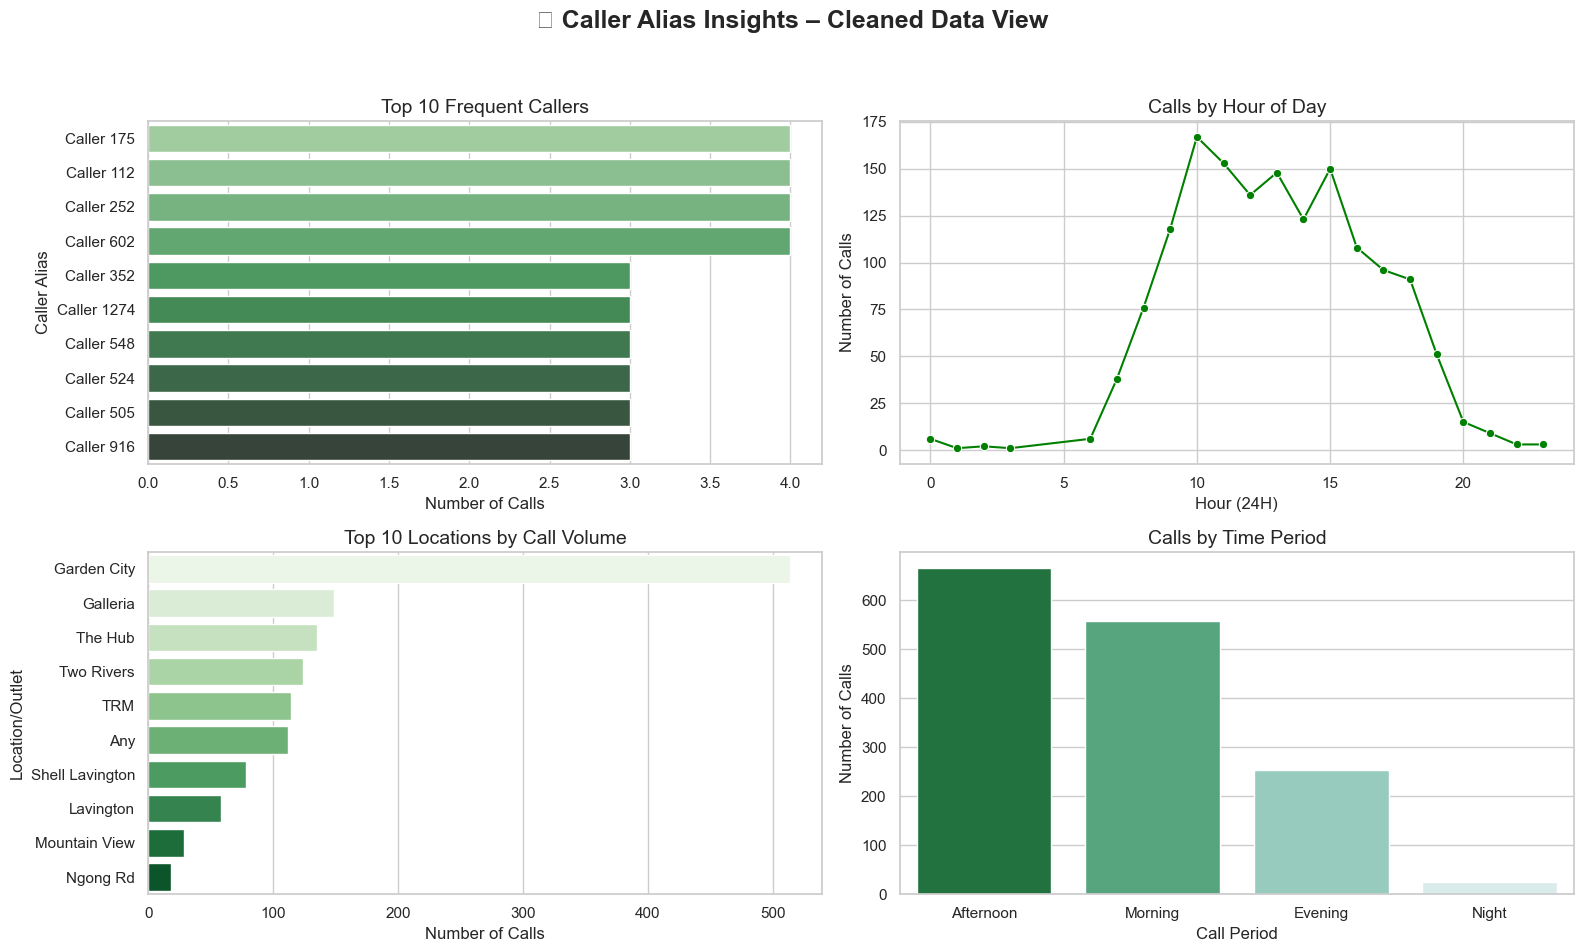

In [664]:

# ✅ Ensure 'Output' folder exists
os.makedirs("Output", exist_ok=True)

# ✅ Set Seaborn theme
sns.set_theme(style="whitegrid", palette="Greens")

# ✅ Filter: Clean Caller Alias (exclude unknown or missing)
filtered_data = calldata[
    calldata["CALLER ALIAS"].notna() &
    (calldata["CALLER ALIAS"].str.strip() != "") &
    (~calldata["CALLER ALIAS"].str.lower().str.contains("unknown"))
]

# ✅ Top 10 Frequent Callers
frequent_callers = (
    filtered_data["CALLER ALIAS"]
    .value_counts()
    .reset_index(name="NUMBER OF CALLS")
    .rename(columns={"index": "CALLER ALIAS"})
    .head(10)
)

# ✅ Hourly Call Distribution
hourly_dist = filtered_data["HOUR"].value_counts().sort_index()

# ✅ Location/Outlet Analysis
location_dist = filtered_data["LOCATION/OUTLET"].value_counts().head(10)

# ✅ Calls by Time Period
call_period_dist = filtered_data["CALL_PERIOD"].value_counts()

# ✅ Plotting All 4 Charts in One Figure
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("📞 Caller Alias Insights – Cleaned Data View", fontsize=18, fontweight='bold')

# 🔹 1. Top 10 Frequent Callers
sns.barplot(data=frequent_callers, x="NUMBER OF CALLS", y="CALLER ALIAS", ax=axs[0, 0], palette="Greens_d")
axs[0, 0].set_title("Top 10 Frequent Callers", fontsize=14)
axs[0, 0].set_xlabel("Number of Calls")
axs[0, 0].set_ylabel("Caller Alias")

# 🔹 2. Hourly Call Distribution
sns.lineplot(x=hourly_dist.index, y=hourly_dist.values, marker="o", ax=axs[0, 1], color="green")
axs[0, 1].set_title("Calls by Hour of Day", fontsize=14)
axs[0, 1].set_xlabel("Hour (24H)")
axs[0, 1].set_ylabel("Number of Calls")

# 🔹 3. Top Locations by Call Volume
sns.barplot(x=location_dist.values, y=location_dist.index, ax=axs[1, 0], palette="Greens")
axs[1, 0].set_title("Top 10 Locations by Call Volume", fontsize=14)
axs[1, 0].set_xlabel("Number of Calls")
axs[1, 0].set_ylabel("Location/Outlet")

# 🔹 4. Call Periods (Morning, Afternoon, Evening)
sns.barplot(x=call_period_dist.index, y=call_period_dist.values, ax=axs[1, 1], palette="BuGn_r")
axs[1, 1].set_title("Calls by Time Period", fontsize=14)
axs[1, 1].set_xlabel("Call Period")
axs[1, 1].set_ylabel("Number of Calls")

# ✅ Layout adjustments and save
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Output/Caller_Alias_Insights.png", dpi=300)
plt.show()



#### Summary: Caller Alias Insights

- **Top Callers:** Highlights the 10 most frequent callers (anonymized) — useful for tracking repeat customers or recurring issues.
- **Hourly Distribution:** Peak call times are between 10 AM – 3 PM, aligning with business hours.
- **Top Locations:** Garden City, Galleria, and The Hub receive the most calls, pointing to high-traffic outlets.
- **Call Periods:** Most calls come in the afternoon, followed by morning hours. Very few occur at night.


### 2. Time-Based Analysis


C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2355798439.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2355798439.py:18: UserWarning:

The palette list has more values (24) than needed (22), which may not be intended.

C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2355798439.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2355798439.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2355798439.py:53: FutureWarning:



Passing `

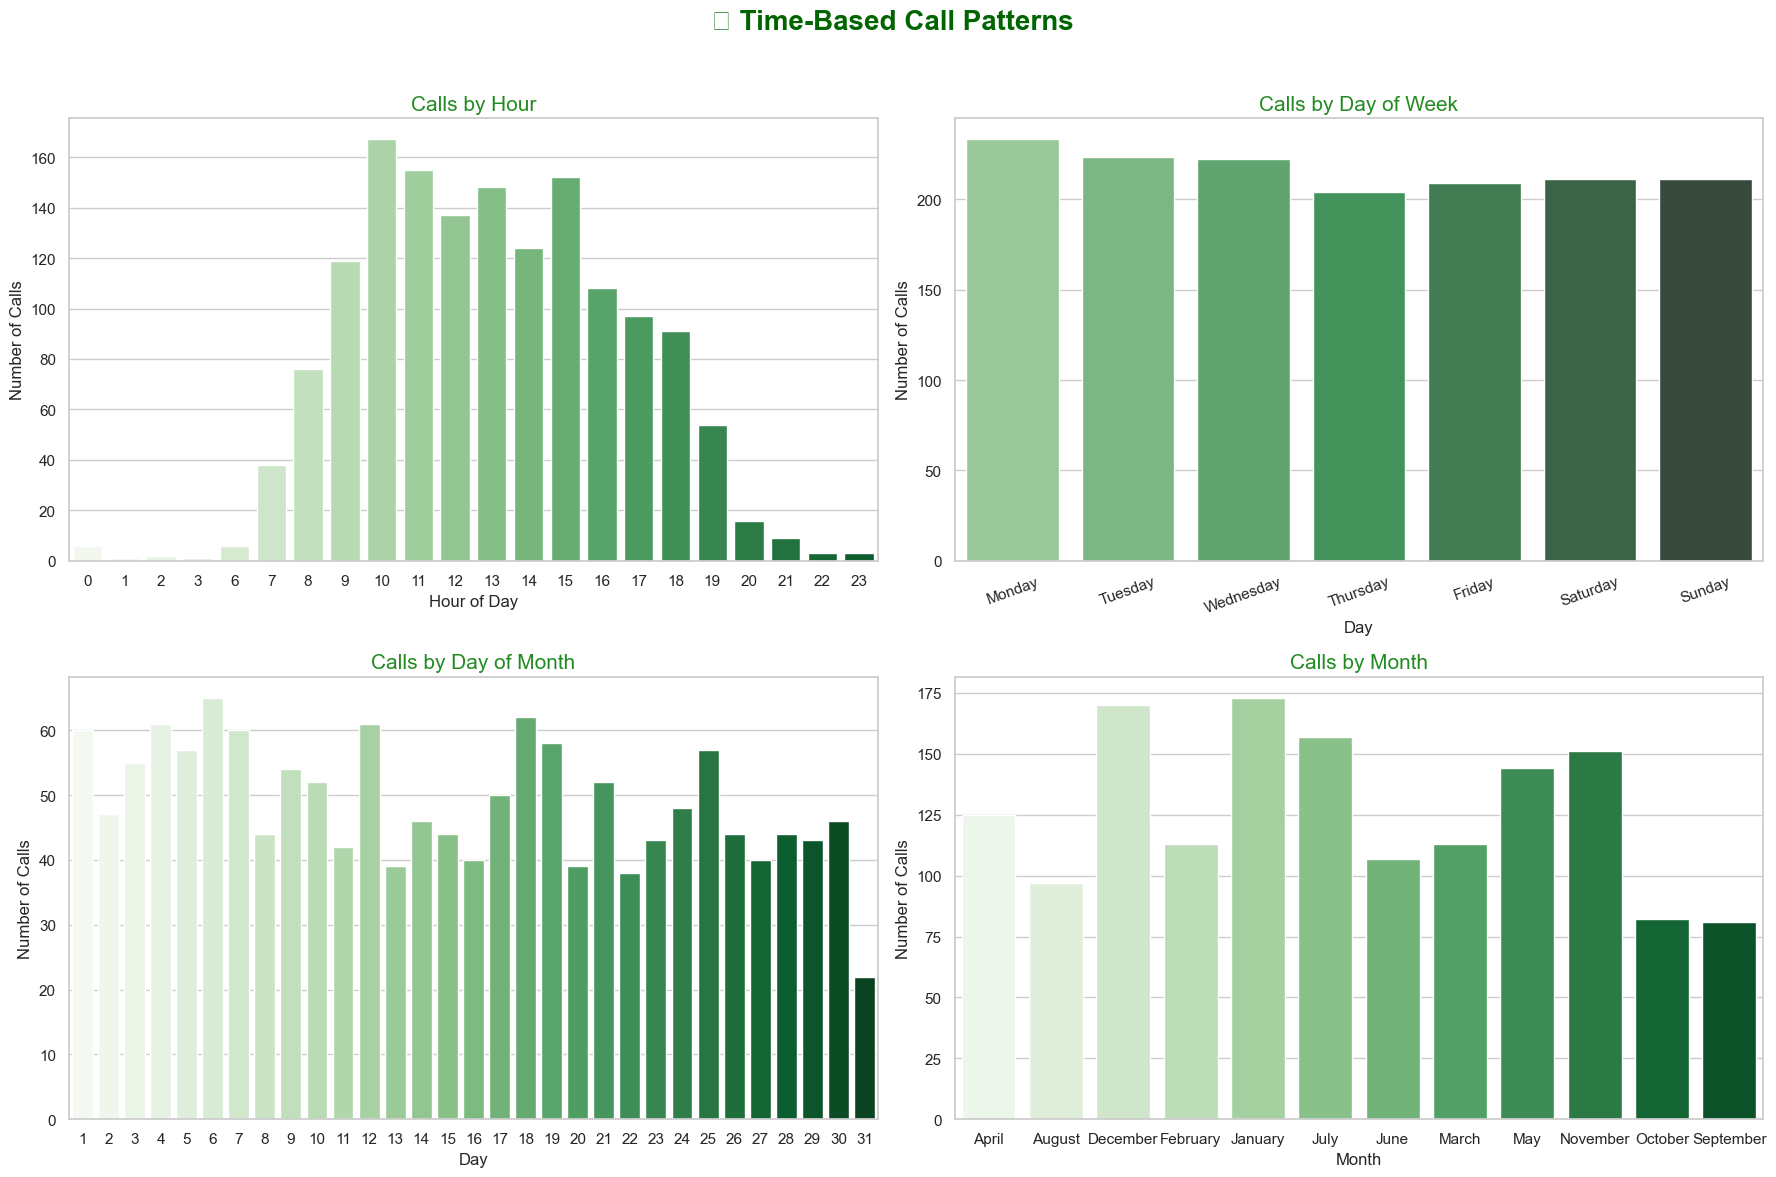

In [665]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Define green color palettes
palette_hour = sns.color_palette("Greens", n_colors=24)
palette_dayofweek = sns.color_palette("Greens_d", n_colors=7)
palette_day = sns.color_palette("Greens", n_colors=31)
palette_month = sns.color_palette("Greens", n_colors=12)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("📞 Time-Based Call Patterns", fontsize=20, fontweight="bold", color="darkgreen")

# 1. Calls by Hour
sns.countplot(
    data=calldata,
    x="HOUR",
    palette=palette_hour,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Calls by Hour", fontsize=15, color="forestgreen")
axes[0, 0].set_xlabel("Hour of Day")
axes[0, 0].set_ylabel("Number of Calls")

# 2. Calls by Day of Week
sns.countplot(
    data=calldata,
    x="DAY_OF_WEEK",
    order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    palette=palette_dayofweek,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Calls by Day of Week", fontsize=15, color="forestgreen")
axes[0, 1].set_xlabel("Day")
axes[0, 1].set_ylabel("Number of Calls")
axes[0, 1].tick_params(axis='x', rotation=20)

# 3. Calls by Day of Month
sns.countplot(
    data=calldata,
    x="DAY",
    palette=palette_day,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Calls by Day of Month", fontsize=15, color="forestgreen")
axes[1, 0].set_xlabel("Day")
axes[1, 0].set_ylabel("Number of Calls")

# 4. Calls by Month
sns.countplot(
    data=calldata,
    x="MONTH",
    palette=palette_month,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Calls by Month", fontsize=15, color="forestgreen")
axes[1, 1].set_xlabel("Month")
axes[1, 1].set_ylabel("Number of Calls")

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save high-res image
plt.savefig("Output/Time_Based_Call_Analysis.png", dpi=300)

# Show plot
plt.show()


#### Time-Based Call Summary

- **Hour of Day**: Most customer calls occur between **10 AM and 6 PM**, peaking at **3 PM**.
- **Day of Week**: Highest call volumes on **Monday Wednesday and Friday**; fairly consistent across other weekdays.
- **Day of Month**: Calls are spread out, with slight peaks in the **first, third and last weeks** of the month.
- **Month**: **December and January** see the most calls; a dip occurs mid-year before picking up again in **July**.


#### Monthly Trends Over-time

C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2504346831.py:18: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2504346831.py:21: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.

c:\Users\hp\anaconda33\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.



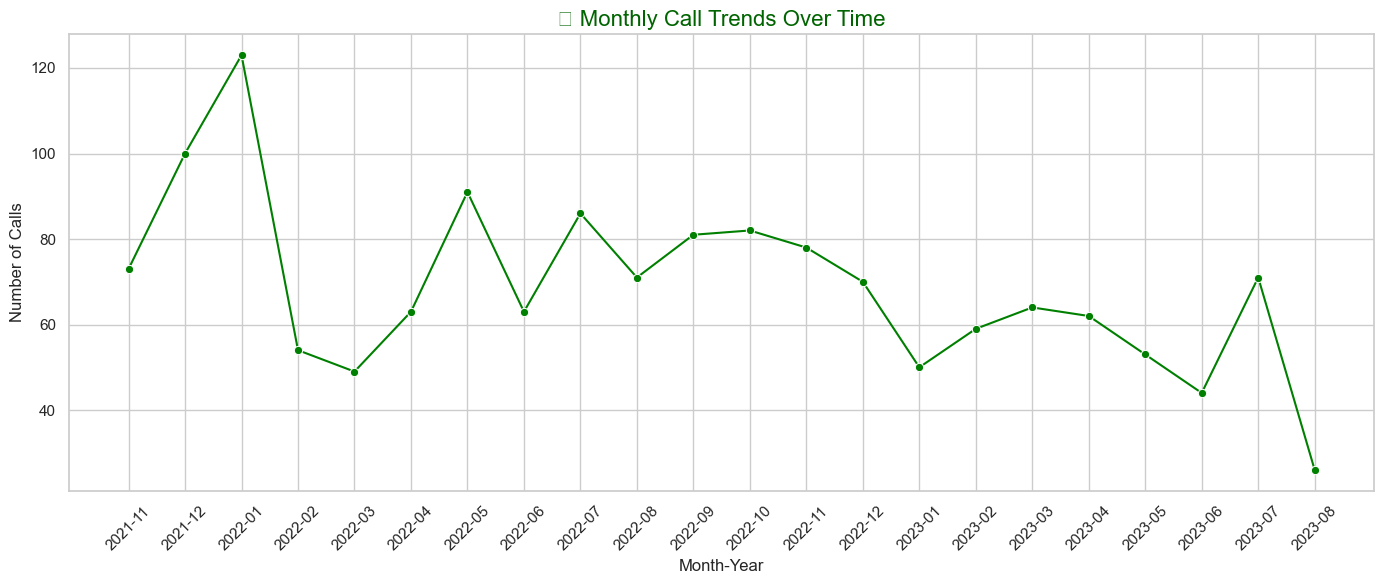

In [666]:
# Ensure 'DATE' is datetime
calldata['DATE'] = pd.to_datetime(calldata['DATE'])

# Create Year-Month column
calldata['YearMonth'] = calldata['DATE'].dt.to_period('M').astype(str)

# Group and count
monthly_trend = calldata.groupby('YearMonth').size().reset_index(name='Number of Calls')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x='YearMonth', y='Number of Calls', marker='o', color='green')
plt.title("📈 Monthly Call Trends Over Time", fontsize=16, color='darkgreen')
plt.xlabel("Month-Year")
plt.ylabel("Number of Calls")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig("Output/monthly_call_trends.png", dpi=300)
plt.show()


#### Summary
January 2022 saw the highest number of calls while January 2023 had the fewest number of calls

### 3. Location-Based Call Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2871662388.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2871662388.py:15: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.

C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2871662388.py:29: UserWarning:

The palette list has more values (8) than needed (5), which may not be intended.

C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2871662388.py:43: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Temp\ipykernel_4040\2871662388.py:44: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.

c:\Users\hp\anaconda33\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN

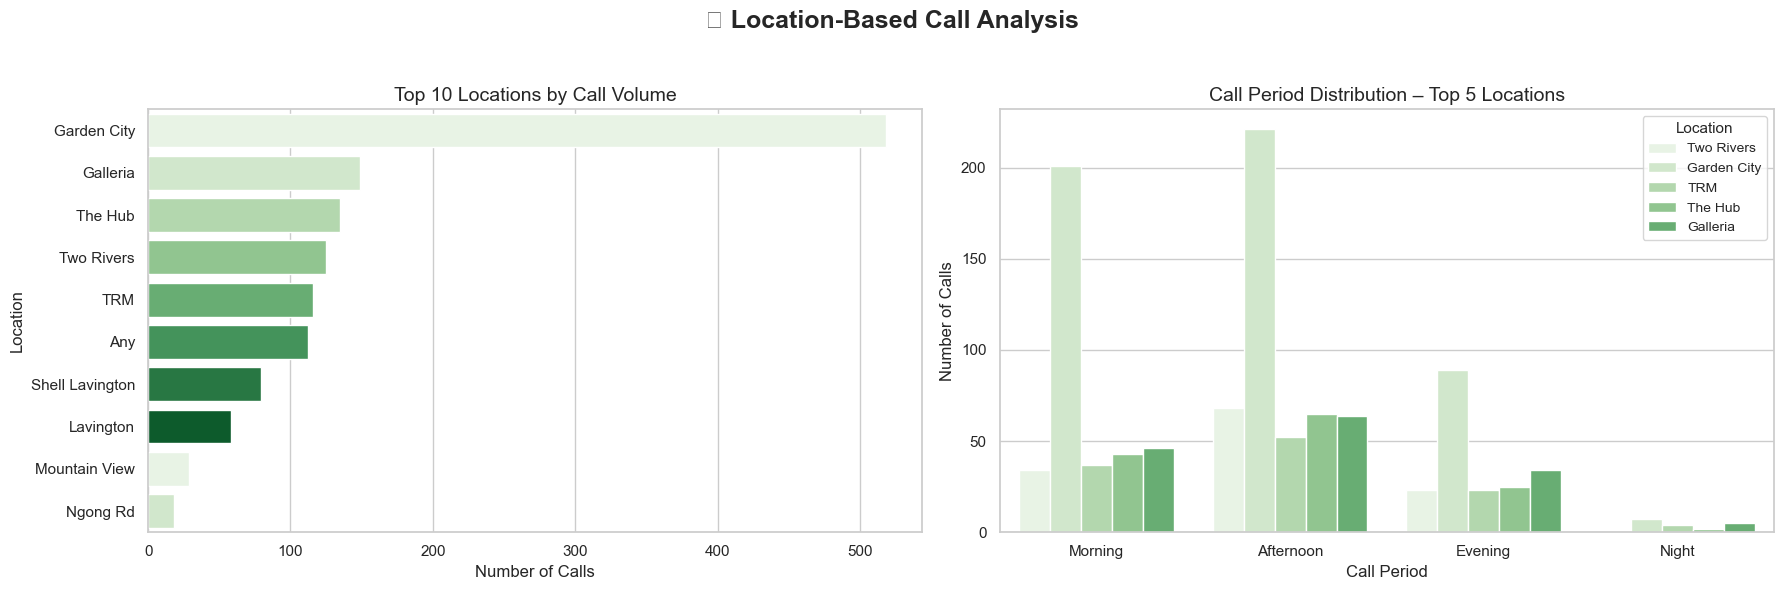

In [667]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette
sns.set(style="whitegrid")
green_palette = sns.color_palette("Greens", as_cmap=False, n_colors=8)

# Initialize figure and axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle("📍 Location-Based Call Analysis", fontsize=18, fontweight='bold')

# --- Plot 1: Top 10 Locations by Number of Calls ---
top_locations = calldata['LOCATION/OUTLET'].value_counts().head(10)

sns.barplot(
    x=top_locations.values,
    y=top_locations.index,
    palette=green_palette,
    ax=axes[0]
)
axes[0].set_title("Top 10 Locations by Call Volume", fontsize=14)
axes[0].set_xlabel("Number of Calls", fontsize=12)
axes[0].set_ylabel("Location", fontsize=12)

# --- Plot 2: Call Period Distribution for Top 5 Locations ---
top5_locs = top_locations.head(5).index
filtered_data = calldata[calldata['LOCATION/OUTLET'].isin(top5_locs)]

sns.countplot(
    data=filtered_data,
    x='CALL_PERIOD',
    hue='LOCATION/OUTLET',
    order=['Morning', 'Afternoon', 'Evening', 'Night'],
    palette=green_palette,
    ax=axes[1]
)
axes[1].set_title("Call Period Distribution – Top 5 Locations", fontsize=14)
axes[1].set_xlabel("Call Period", fontsize=12)
axes[1].set_ylabel("Number of Calls", fontsize=12)
axes[1].legend(title="Location", fontsize=10, title_fontsize=11)

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Output/location_based_analysis.png", dpi=300)
plt.show()


### Location-Based Call Summary

- **Top 10 Locations**: Garden City leads in call volume, followed by Galleria, The Hub, Two Rivers, and TRM.
- **"Any"** indicates clients willing to visit **any branch**

### 🕒 Call Period by Location

- Most calls from top locations happen in the **Afternoon** and **Evening**.
- **Night calls** are minimal, likely due to limited service hours.
- These insights support **staffing** and **branch-level planning**.




### 4. Reason-Based Call Analysis

**Key Insights:**
- **"CALL FOR SERVICE"** is by far the most frequent reason, indicating that customers often seek service assistance rather than making complaints or inquiries.
- Other common reasons include:
  - **"INQUIRY"**
  - **"CALL TO FIND OUT IF CAR IS READY"**
  - **"FOLLOW UP"**

**Key Insights:**
- **Afternoon and morning** hours consistently show higher call activity for **"CALL FOR SERVICE"** and **"INQUIRY"**.
- The **"FOLLOW UP"** reason is more spread out across the day, reflecting ongoing communication loops.
- **Night** time has the lowest call volumes, and the reasons are mostly for **urgent service needs or clarifications**.


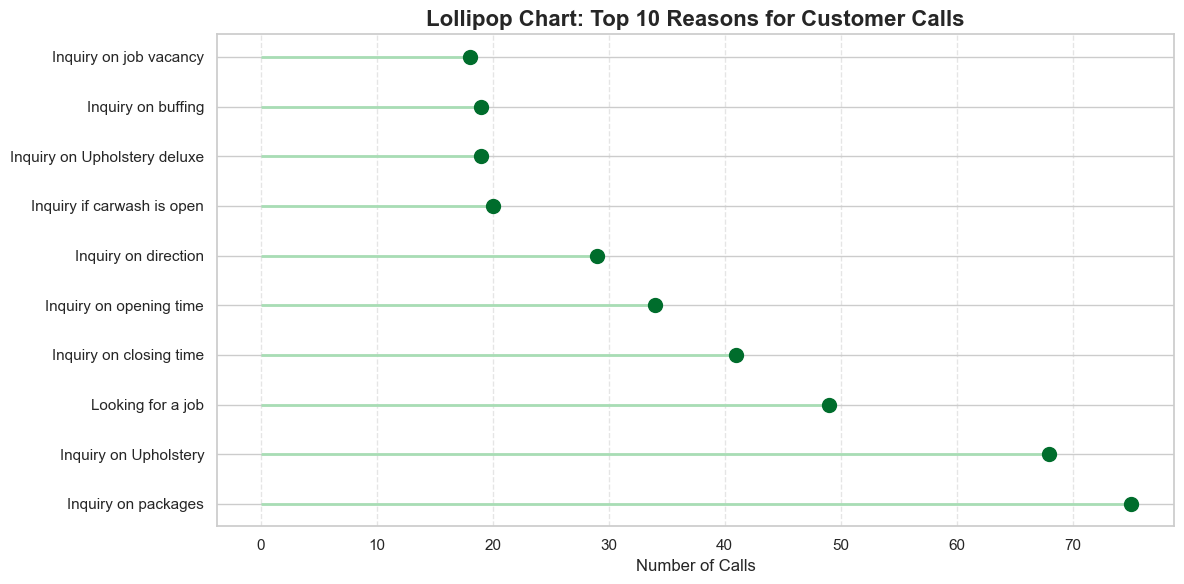

In [668]:
import os
import matplotlib.pyplot as plt

# Create output folder if it doesn't exist
os.makedirs("Output", exist_ok=True)

# Ensure top_reasons is a proper Series with both index and values
top_reasons = calldata['REASON FOR CALL'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.hlines(y=top_reasons.index.tolist(), xmin=0, xmax=top_reasons.values, color='#a8ddb5', linewidth=2)
plt.plot(top_reasons.values, top_reasons.index.tolist(), "o", color='#006d2c', markersize=10)

# Style
plt.title('Lollipop Chart: Top 10 Reasons for Customer Calls', fontsize=16, weight='bold')
plt.xlabel('Number of Calls')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save in HD
plt.savefig("Output/lollipop_top_reasons_green.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


In [669]:
!pip install plotly


In [670]:
!pip install webdriver-manager


In [671]:
import plotly.express as px
import pandas as pd
import os
import time

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Step 1: Prepare Data
top5_reasons = calldata["REASON FOR CALL"].value_counts().nlargest(5).index
filtered = calldata[calldata["REASON FOR CALL"].isin(top5_reasons)]

top3_responses_per_reason = (
    filtered.groupby("REASON FOR CALL")["RESPONSE GIVEN/CONCLUSION"]
    .apply(lambda x: x.value_counts().nlargest(3).index)
    .explode()
    .reset_index(drop=True)
)

filtered = filtered[
    filtered["RESPONSE GIVEN/CONCLUSION"].isin(top3_responses_per_reason)
]

# Step 2: Create Sunburst Chart
fig = px.sunburst(
    filtered,
    path=["REASON FOR CALL", "RESPONSE GIVEN/CONCLUSION"],
    title="Top 5 Reasons and Their Top 3 Responses",
    color="REASON FOR CALL",
    color_discrete_sequence=px.colors.sequential.Greens
)
fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))

# Step 3: Save as HTML
os.makedirs("Output", exist_ok=True)
html_path = os.path.abspath("Output/sunburst_reason_response.html")
fig.write_html(html_path)

# Step 4: Take JPG Screenshot Without Kaleido (using Selenium)
options = Options()
options.headless = True
options.add_argument("--window-size=1200,800")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.get("file://" + html_path)

time.sleep(3)  # Wait for chart to fully render

driver.save_screenshot("Output/sunburst_reason_response.jpg")
driver.quit()


c:\Users\hp\anaconda33\Lib\site-packages\selenium\webdriver\remote\webdriver.py:1021: UserWarning:

name used for saved screenshot does not match file type. It should end with a `.png` extension



## 📊 Summary of Key Findings

This analysis examined customer care call data to uncover patterns in caller behavior, reasons for contact, and business response practices.

### 🔹 Most Common Call Reasons
- **"CALL FOR SERVICE"** was the most frequent reason, dominating overall call volume.
- Other high-volume reasons included **"INQUIRY"**, **"CALL TO FIND OUT IF CAR IS READY"**, and **"FOLLOW UP"**.
- These trends suggest customers primarily call to request services or track service progress, not to report issues.

### 🔹 Time-Based Call Trends
- Peak call periods occurred in the **Morning** and **Afternoon**, aligning with typical customer availability and business hours.
- Fewer calls were received at **Night**, usually related to urgent clarifications or next-day planning.
- Certain reasons like **"FOLLOW UP"** and **"COMPLAINT"** were more evenly distributed across the day.

### 🔹 Response Patterns
- The most common responses included **"Advised"**,  and **"Assisted"**.
- Many customers received direct, actionable responses—often requiring a visit to the outlet.
- Very few calls indicated customers switching outlets or needing further escalation.


## 💡 Business Insights & Recommendations

1. **Optimize Staff Scheduling** during peak call times (Morning & Afternoon) to reduce missed calls and waiting times.
2. **Streamline Call Reason Categories** (e.g., merge “Inquiry” and “General Inquiry”) to improve reporting clarity and reduce redundancy.
3. **Implement a Call Tracking or Ticketing System** to manage follow-ups and reduce customer frustration due to repeated calls.
4. **Introduce an FAQ Section or Chatbot** on WhatsApp or website to handle common inquiries automatically and improve efficiency.
5. **Monitor and Analyze Response Quality** regularly to ensure consistency across different branches and times of day.

---

## ✅ Conclusion

This analysis provides a clear window into customer engagement via phone support. By identifying service demand peaks, common concerns, and resolution trends, the business is better positioned to improve operational efficiency, deliver consistent service quality, and build stronger customer relationships.

> **Next Step**: These insights can now be translated into an interactive dashboard for real-time monitoring and future scalability.
